# User guide

First of all you should import the package:

In [11]:
import skextremes as ske
import matplotlib.pyplot as plt
%matplotlib inline

Some datasets are included in the package. For example, we will use sea level data from Port Pirie, in Australia.

In [2]:
data = ske.datasets.portpirie()

In [6]:
print(data.description)


    Annual Maximum Sea Levels at Port Pirie, South Australia
    --------------------------------------------------------

    Fields:
     year: numpy.array defining the year for the row data.
     sea_level: numpy.array defining annual maximum sea level recorded at
        Port Pirie, South Australia.
     
    Source:
     -Coles, S. G. (2001). An Introduction to Statistical Modelling of 
        Extreme Values. London: Springer.
    


As can be seen from the description of the dataset we have two fields, `sea_level`, with the annual maximum sea level records, and `year`, indicating the year of the record.

To get the dataset we can use the `.asarray` method to obtain all the fields as a `numpy.array` or just select a field to get a 1D `numpy.array` with the records for the field.

In [7]:
data_array = data.asarray()
sea_levels = data.fields.sea_level

In [8]:
print(sea_levels)

[ 4.03  3.83  3.65  3.88  4.01  4.08  4.18  3.8   4.36  3.96  3.98  4.69
  3.85  3.96  3.85  3.93  3.75  3.63  3.57  4.25  3.97  4.05  4.24  4.22
  3.73  4.37  4.06  3.71  3.96  4.06  4.55  3.79  3.89  4.11  3.85  3.86
  3.86  4.21  4.01  4.11  4.24  3.96  4.21  3.74  3.85  3.88  3.66  4.11
  3.71  4.18  3.9   3.78  3.91  3.72  4.    3.66  3.62  4.33  4.55  3.75
  4.08  3.9   3.88  3.94  4.33]


We have several options, located in the `skextremes.models` subpackage, to calculate extreme values. Depending the chosen model some methods and attributes will be available.

Models are divided in several packages:

* `wind`: Some very basic functions to calculate wind extreme values obtained from the Wind Energy industry. These are very basic approximations based on parameters of wind data and should only be used to calculate the expected wind speed value for a 50 years return period.
* `engineering`: Basic models found in the literature based, mainly, on the Gumbel distribution and the Block Maxima approach.
* `classic`: A more classical approach from the theory to obtain extreme values using fitting accepted distributions generally used in the extreme value theory.

In [9]:
model = ske.models.engineering.Lieblein(sea_levels)

Once the model is fitted you can see the results:

(<matplotlib.figure.Figure at 0xf449d70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x4693410>)

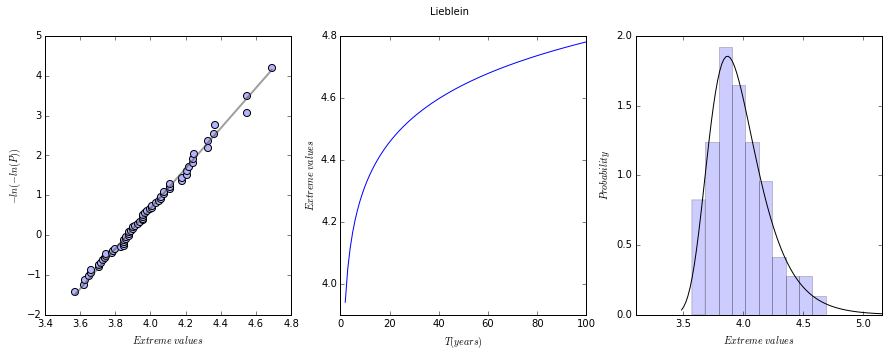

In [12]:
model.plot_summary()

To see, for instance, the parameters obtained you can use:

In [14]:
print(model.c, model.loc, model.scale)

0 3.86774852633 0.198420194778


Another approach would be to use a more classic model:

In [17]:
model = ske.models.classic.GEV(sea_levels, fit_method = 'mle', ci = 0.05,
                              ci_method = 'delta')

d:\users\X003621\AppData\Local\Continuum\Miniconda3\lib\site-packages\numdifftools\core.py:753: UserWarning: The stepsize (3.16814) is possibly too large!
  warnings.warn('The stepsize (%g) is possibly too large!' % h1[i])
d:\users\X003621\AppData\Local\Continuum\Miniconda3\lib\site-packages\numdifftools\core.py:753: UserWarning: The stepsize (0.18069) is possibly too large!
  warnings.warn('The stepsize (%g) is possibly too large!' % h1[i])
d:\users\X003621\AppData\Local\Continuum\Miniconda3\lib\site-packages\numdifftools\core.py:753: UserWarning: The stepsize (0.278302) is possibly too large!
  warnings.warn('The stepsize (%g) is possibly too large!' % h1[i])
d:\users\X003621\AppData\Local\Continuum\Miniconda3\lib\site-packages\numdifftools\core.py:753: UserWarning: The stepsize (0.0664633) is possibly too large!
  warnings.warn('The stepsize (%g) is possibly too large!' % h1[i])


In [18]:
model.params

OrderedDict([('shape', 0.050109518363545352),
             ('location', 3.8747498425529501),
             ('scale', 0.19804394476624812)])

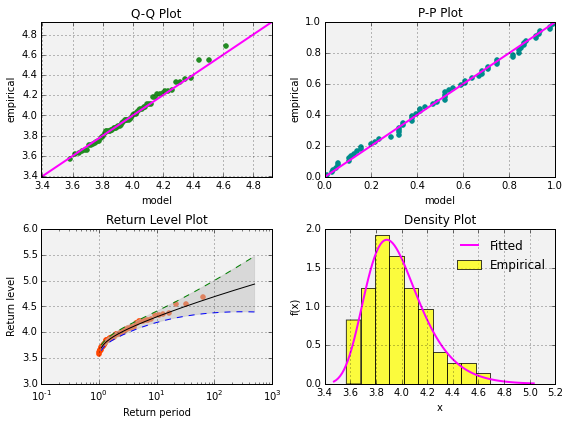

In [20]:
model.plot_summary()
plt.show()